In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [4]:
dff= pd.read_csv('stocks data.csv')

In [5]:
pd.isnull(dff).sum()

Symbol                                              0
Company Name                                        0
Security Price                                      0
Volume (90 Day Avg)                                 0
Market Capitalization                               0
Dividend Yield                                     82
Company Headquarters Location                       0
Sector                                              0
Industry                                            0
Price Performance (52 Weeks)                        0
Total Return (1 Yr Annualized)                      0
Beta (1 Year Annualized)                            1
Standard Deviation (1 Yr Annualized)                0
S&P Global Market Intelligence Valuation            2
S&P Global Market Intelligence Quality              2
S&P Global Market Intelligence Growth Stability     2
S&P Global Market Intelligence Financial Health     3
P/E (Price/TTM Earnings)                            0
PEG Ratio                   

In [6]:
numeric_columns = dff.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with their mean
dff[numeric_columns] = dff[numeric_columns].fillna(dff[numeric_columns].mean())

# Check the result
print(dff)

    Symbol              Company Name  Security Price  Volume (90 Day Avg)  \
0        A  Agilent Technologies Inc           66.46              2.14098   
1     ARNC               Arconic Inc           13.25              4.02010   
2      AAP   Advance Auto Parts Inc.           75.03              1.13519   
3     AAPL                 Apple Inc          229.24             38.10976   
4      ABC    AmerisourceBergen Corp           80.61              1.52414   
..     ...                       ...             ...                  ...   
495    FTV              Fortive Corp           45.58              2.05879   
496     LW  Lamb Weston Holdings Inc           47.63              1.17063   
497     IR        Ingersoll Rand Inc           19.61              3.24505   
498     DD    DuPont  De Nemours Inc           31.47              6.82736   
499    LIN                 Linde Plc          151.30              2.07089   

    Market Capitalization  Dividend Yield Company Headquarters Location  \


In [7]:
import pandas as pd
import numpy as np

# Assuming 'dff' is your DataFrame
# Convert '--' to NaN
dff.replace('--', np.nan, inplace=True)

# Select only numeric columns
numeric_columns = dff.select_dtypes(include=['number']).columns

# Replace NaN values (including '--' replaced ones) in numeric columns with their mean
dff[numeric_columns] = dff[numeric_columns].fillna(dff[numeric_columns].mean())

# Check the result
print(dff)


    Symbol              Company Name  Security Price  Volume (90 Day Avg)  \
0        A  Agilent Technologies Inc           66.46              2.14098   
1     ARNC               Arconic Inc           13.25              4.02010   
2      AAP   Advance Auto Parts Inc.           75.03              1.13519   
3     AAPL                 Apple Inc          229.24             38.10976   
4      ABC    AmerisourceBergen Corp           80.61              1.52414   
..     ...                       ...             ...                  ...   
495    FTV              Fortive Corp           45.58              2.05879   
496     LW  Lamb Weston Holdings Inc           47.63              1.17063   
497     IR        Ingersoll Rand Inc           19.61              3.24505   
498     DD    DuPont  De Nemours Inc           31.47              6.82736   
499    LIN                 Linde Plc          151.30              2.07089   

    Market Capitalization  Dividend Yield Company Headquarters Location  \


In [8]:
pd.isnull(dff).sum()

Symbol                                              0
Company Name                                        0
Security Price                                      0
Volume (90 Day Avg)                                 0
Market Capitalization                               0
Dividend Yield                                      0
Company Headquarters Location                       0
Sector                                              0
Industry                                            0
Price Performance (52 Weeks)                        0
Total Return (1 Yr Annualized)                      0
Beta (1 Year Annualized)                            0
Standard Deviation (1 Yr Annualized)                0
S&P Global Market Intelligence Valuation            0
S&P Global Market Intelligence Quality              0
S&P Global Market Intelligence Growth Stability     0
S&P Global Market Intelligence Financial Health     0
P/E (Price/TTM Earnings)                           32
PEG Ratio                   

In [9]:
dff['P/E (Price/TTM Earnings)'] = dff['P/E (Price/TTM Earnings)'].replace('--', np.nan)

# Step 2: Convert the column to numeric (this will also handle the NaN)
dff['P/E (Price/TTM Earnings)'] = pd.to_numeric(dff['P/E (Price/TTM Earnings)'], errors='coerce')

# Step 3: Replace NaN with the mean of the column
mean_value = dff['P/E (Price/TTM Earnings)'].mean()
dff['P/E (Price/TTM Earnings)'] = dff['P/E (Price/TTM Earnings)'].fillna(mean_value)

# Output the updated DataFrame
print(dff)

    Symbol              Company Name  Security Price  Volume (90 Day Avg)  \
0        A  Agilent Technologies Inc           66.46              2.14098   
1     ARNC               Arconic Inc           13.25              4.02010   
2      AAP   Advance Auto Parts Inc.           75.03              1.13519   
3     AAPL                 Apple Inc          229.24             38.10976   
4      ABC    AmerisourceBergen Corp           80.61              1.52414   
..     ...                       ...             ...                  ...   
495    FTV              Fortive Corp           45.58              2.05879   
496     LW  Lamb Weston Holdings Inc           47.63              1.17063   
497     IR        Ingersoll Rand Inc           19.61              3.24505   
498     DD    DuPont  De Nemours Inc           31.47              6.82736   
499    LIN                 Linde Plc          151.30              2.07089   

    Market Capitalization  Dividend Yield Company Headquarters Location  \


In [10]:
pd.isnull(dff).sum()

Symbol                                             0
Company Name                                       0
Security Price                                     0
Volume (90 Day Avg)                                0
Market Capitalization                              0
Dividend Yield                                     0
Company Headquarters Location                      0
Sector                                             0
Industry                                           0
Price Performance (52 Weeks)                       0
Total Return (1 Yr Annualized)                     0
Beta (1 Year Annualized)                           0
Standard Deviation (1 Yr Annualized)               0
S&P Global Market Intelligence Valuation           0
S&P Global Market Intelligence Quality             0
S&P Global Market Intelligence Growth Stability    0
S&P Global Market Intelligence Financial Health    0
P/E (Price/TTM Earnings)                           0
PEG Ratio                                     

In [11]:
df = pd.get_dummies(dff, drop_first=True)

In [12]:
X = df.drop(columns=['Price Performance (52 Weeks)'])
y = df['Price Performance (52 Weeks)']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [16]:
# Predictions
y_pred = rf_model.predict(X_test_scaled)

In [20]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1.1556285194501352
Root Mean Squared Error: 1.6849622740173966
R-squared: 0.9946111562133593


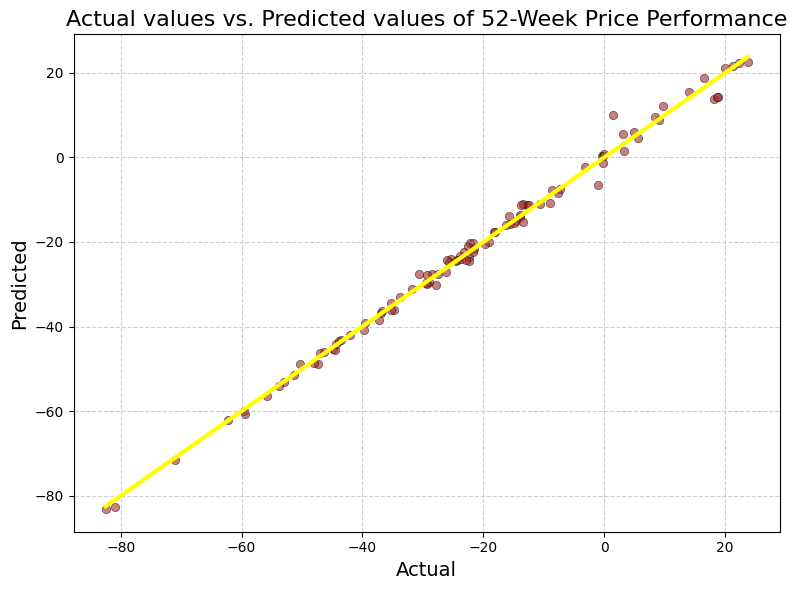

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot for actual vs. predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='brown', alpha=0.6, edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='yellow', linestyle='solid', linewidth=3)
plt.title('Actual values vs. Predicted values of 52-Week Price Performance', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
